# Assignment 4

In [62]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

import networkx as nx
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_scoreimport networkx as nx
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [221]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [64]:
G1 = nx.read_gpickle("assets/A4_P1_G1")
G2 = nx.read_gpickle("assets/A4_P1_G2")
G3 = nx.read_gpickle("assets/A4_P1_G3")
G4 = nx.read_gpickle("assets/A4_P1_G4")
G5 = nx.read_gpickle("assets/A4_P1_G5")
P1_Graphs = [G1, G2, G3, G4, G5]

In [65]:
P1_Graphs


In [66]:
# all have 1000 nodes!

[(graph.number_of_nodes(), graph.number_of_edges()) for graph in P1_Graphs]

[(1000, 999), (1000, 2000), (1000, 2000), (1000, 999), (1000, 2000)]

In [67]:
sorted(nx.preferential_attachment(G1), reverse = True, key = lambda tup: tup[2]);


<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [68]:
[nx.average_clustering(graph) for graph in P1_Graphs]


[0.0, 0.49310000000000004, 0.4897333333333334, 0.0, 0.36504285714285717]

In [69]:
[nx.average_shortest_path_length(graph) for graph in P1_Graphs]


[6.530506506506507,
 43.80284684684685,
 39.007695695695695,
 8.158990990990992,
 8.532046046046046]

In [70]:
G1.degree();


In [71]:
def plot_degree_distribution(graph) -> None:
    
    nnodes = graph.number_of_nodes()
    ddist = Counter([degree for (node, degree) in graph.degree()])
    
    fig, axes = plt.subplots(nrows = 1, ncols = 1)
    fig.set_size_inches(5, 5)
    axes.plot(ddist.keys(), ddist.values(), color = "red", marker = "o", linestyle = "None", markeredgecolor = "black")
    axes.set_xlabel("Degrees")
    axes.set_xscale("log")
    axes.set_yscale("log")
    axes.set_ylabel("Fraction of nodes")
    plt.show()

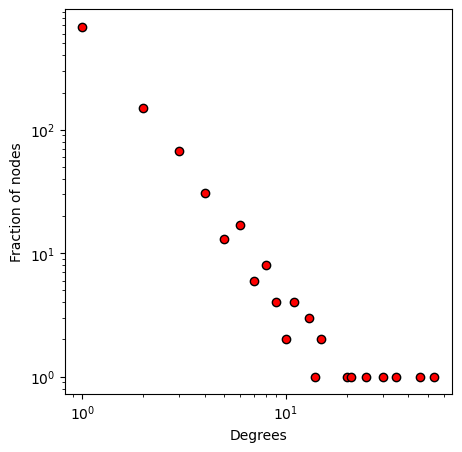

In [72]:
plot_degree_distribution(G1)


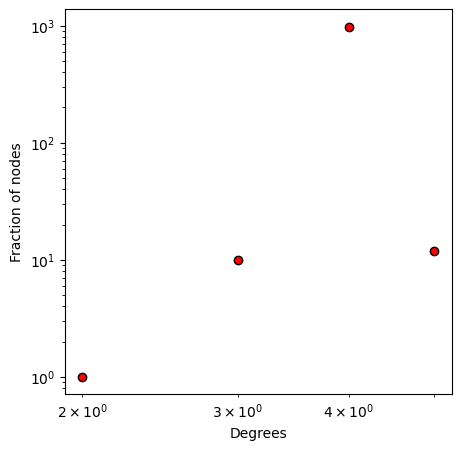

In [73]:
plot_degree_distribution(G2)


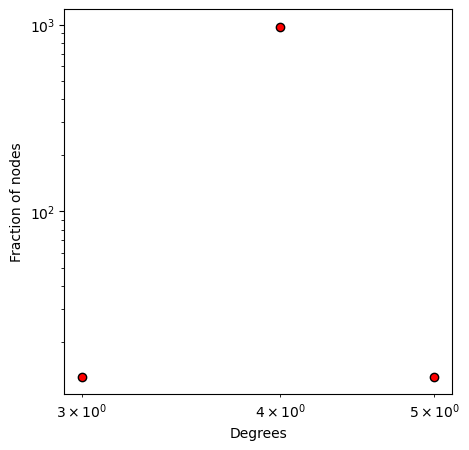

In [74]:
plot_degree_distribution(G3)


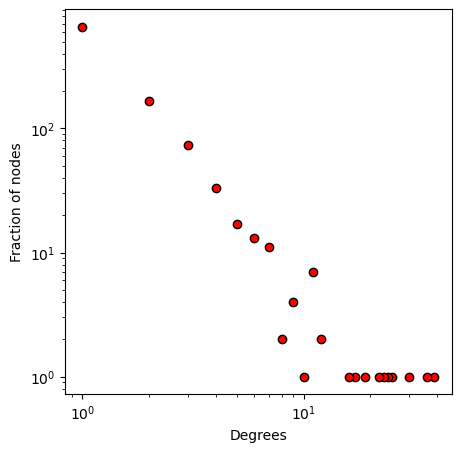

In [75]:
plot_degree_distribution(G4)


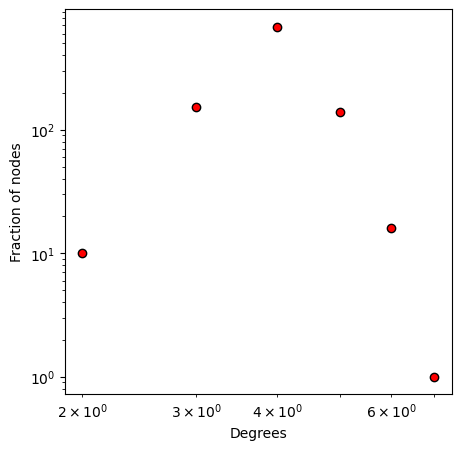

In [76]:
plot_degree_distribution(G5)


In [77]:
[(nx.average_clustering(graph), nx.average_shortest_path_length(graph)) for graph in P1_Graphs]


[(0.0, 6.530506506506507),
 (0.49310000000000004, 43.80284684684685),
 (0.4897333333333334, 39.007695695695695),
 (0.0, 8.158990990990992),
 (0.36504285714285717, 8.532046046046046)]

In [78]:
# Preferential attachment - nx.barabasi_albert_graph
# Samll World - nx.watts_strogatz_graph

def graph_identification():
    return ["PA", "SW_L", "SW_L", "PA", "SW_H"]

In [79]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [167]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


nx.is_directed(G)
### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [222]:
nx.is_directed(G)


False

In [223]:
np.mean([G.degree()[node] for node in G.nodes() if nx.get_node_attributes(G, "ManagementSalary")[node] == 1])


81.94117647058823

In [224]:
np.mean([G.degree()[node] for node in G.nodes() if nx.get_node_attributes(G, "ManagementSalary")[node] == 0])


24.613564668769715

In [225]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [226]:
list(nx.neighbors(G, 1));


In [233]:
dep = nx.get_node_attributes(G, "Department");
mgmt_salary = nx.get_node_attributes(G, "ManagementSalary");
degrees = dict(nx.degree(G));

In [238]:
# and number of neighbours who receive a management salary

neighbours_with_mgmt_salary = dict.fromkeys(G.nodes(), 0)
node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")

for node in G.nodes():
    for neighbour in nx.neighbors(G, node):
        if node_mgmt_attrs.get(neighbour) == 1:
            neighbours_with_mgmt_salary[node] += 1

In [239]:
# number of neighbours from the same department who also receive a management salary

neighbours_with_mgmt_salary_same_dept = dict.fromkeys(G.nodes(), 0)
node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")
node_dept_attrs = nx.get_node_attributes(G, "Department")

for node in G.nodes():
    for neighbour in nx.neighbors(G, node):
        if (node_mgmt_attrs.get(neighbour) == 1) and (node_dept_attrs.get(node) == node_dept_attrs.get(neighbour)):
            neighbours_with_mgmt_salary_same_dept[node] += 1

In [240]:
pd.DataFrame([dep, mgmt_salary, degrees, neighbours_with_mgmt_salary, neighbours_with_mgmt_salary_same_dept]).T.sort_index()


,0,1,2,3,4
0,1.0,0.0,44.0,6.0,0.0
1,1.0,NaN,52.0,15.0,0.0
2,21.0,NaN,95.0,31.0,9.0
3,21.0,1.0,71.0,24.0,9.0
4,21.0,1.0,96.0,35.0,9.0
...,...,...,...,...,...
1000,4.0,NaN,6.0,3.0,2.0
1001,21.0,NaN,10.0,3.0,2.0
1002,1.0,0.0,1.0,1.0,0.0
1003,6.0,0.0,1.0,0.0,0.0


In [241]:
type(node_dept_attrs), type(node_mgmt_attrs), type(neighbours_with_mgmt_salary_same_dept), type(neighbours_with_mgmt_salary)


(dict, dict, dict, dict)

In [242]:
sorted(node_dept_attrs.items());


In [243]:
def sort_dict_values_keys(dictionary: dict) -> list:
    return [val for (key, val) in sorted(dictionary.items(), reverse = False)]

In [244]:
ccentrality = sort_dict_values_keys(nx.closeness_centrality(G))
bwcentrality = sort_dict_values_keys(nx.betweenness_centrality(G))

In [245]:
employees = pd.DataFrame({"Department": sort_dict_values_keys(dep), "ManagementSalary": sort_dict_values_keys(mgmt_salary),
             "NeighboursMgmtSameDept": sort_dict_values_keys(neighbours_with_mgmt_salary_same_dept),
            "NeighboursMgmt": sort_dict_values_keys(neighbours_with_mgmt_salary), "Degree": sort_dict_values_keys(degrees),
            "ClosenessCentrality": ccentrality, "BetweennessCentrality": bwcentrality})

In [246]:
employees.shape


(1005, 7)

In [247]:
train_x = employees.dropna(axis = 0).drop("ManagementSalary", axis = 1)


In [248]:
train_y = employees.dropna(axis = 0).loc[:, "ManagementSalary"]


In [249]:
test_x = employees.loc[employees.ManagementSalary.isna(), :].drop("ManagementSalary", axis = 1)


In [250]:
test_x.index


Int64Index([   1,    2,    5,    8,   14,   18,   27,   30,   31,   34,
            ...
             974,  984,  987,  989,  991,  992,  994,  996, 1000, 1001],
           dtype='int64', length=252)

In [251]:
train_x


,Department,NeighboursMgmtSameDept,NeighboursMgmt,Degree,ClosenessCentrality,BetweennessCentrality
0,1,0,6,44,0.421991,0.001124
3,21,9,24,71,0.441663,0.001654
4,21,9,35,96,0.462152,0.005547
6,25,3,34,115,0.475805,0.012387
7,14,4,6,72,0.420156,0.002818
...,...,...,...,...,...,...
998,14,0,0,1,0.313753,0.000000
999,15,0,0,1,0.311729,0.000000
1002,1,0,1,1,0.297983,0.000000
1003,6,0,0,1,0.298167,0.000000


In [252]:
train_y.isna().sum()


0

In [253]:
classifier = RandomForestClassifier(n_estimators = 10_000, max_depth = 20)
classifier.fit(train_x, train_y)

RandomForestClassifier(max_depth=20, n_estimators=10000)

In [254]:
classifier.classes_


array([0., 1.])

In [255]:
# probability of 1 , probability of 0
predictions = pd.Series(classifier.predict(train_x), index = train_x.index)
predictions[:10]

0     0.0
3     1.0
4     1.0
6     1.0
7     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    1.0
dtype: float64

In [256]:
[one for (zero, one) in classifier.predict_proba(test_x)];


In [257]:
accuracy_score(train_y, predictions)


1.0

In [258]:
ccentrality = sort_dict_values_keys(nx.closeness_centrality(G));
bwcentrality = sort_dict_values_keys(nx.betweenness_centrality(G));

In [259]:
nx.clustering(G);


In [260]:
df = pd.DataFrame(index = G.nodes())
df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(dict(nx.degree(G)))
df['dcentrality'] = pd.Series(nx.degree_centrality(G))
df['ccentrality'] = pd.Series(nx.closeness_centrality(G, wf_improved = True))
df['bcentrality'] = pd.Series(nx.betweenness_centrality(G, normalized = True))
df['prank'] = pd.Series(nx.pagerank(G))
df['is_management'] = pd.Series(list(nx.get_node_attributes(G,'ManagementSalary').values()))
features = ['clustering', 'degree', 'dcentrality', 'ccentrality', 'bcentrality', 'prank']

In [261]:
df

,clustering,degree,dcentrality,ccentrality,bcentrality,prank,is_management
0,0.276423,44,0.043825,0.421991,0.001124,0.001224,0.0
1,0.265306,52,0.051793,0.422360,0.001195,0.001426,NaN
581,0.248276,32,0.031873,0.412974,0.000378,0.000894,NaN
6,0.155183,115,0.114542,0.475805,0.012387,0.003146,0.0
65,0.172880,91,0.090637,0.461049,0.012473,0.002857,0.0
...,...,...,...,...,...,...,...
798,0.000000,2,0.001992,0.000000,0.000000,0.000995,0.0
808,0.000000,2,0.001992,0.000000,0.000000,0.000995,NaN
965,0.000000,1,0.000996,0.277769,0.000000,0.000182,0.0
973,0.000000,1,0.000996,0.305327,0.000000,0.000177,0.0


In [262]:
train_df = df.loc[~df['is_management'].isna(), :]
test_df = df.loc[df['is_management'].isna(), :]

train_x = train_df.loc[:, features]
train_y = train_df.loc[:, 'is_management']
test_x = test_df.loc[:, features]
scaler = MinMaxScaler()
train_x_normed = scaler.fit_transform(train_x)
test_x_normed = scaler.transform(test_x)
clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5, random_state = 0, solver = 'lbfgs', verbose = False)
clf.fit(X_train_scaled, y_train)

test_proba = [one for (zero, one) in clf.predict_proba(X_test_scaled)]
    
    
pd.Series(test_proba, X_test.index) 

NameError: name 'X_train_scaled' is not defined

In [273]:
def salary_predictions():
    
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.neural_network import MLPClassifier
    

    df = pd.DataFrame(index = G.nodes())
    df['clustering'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(dict(nx.degree(G)))
    df['dcentrality'] = pd.Series(nx.degree_centrality(G))
    df['ccentrality'] = pd.Series(nx.closeness_centrality(G, wf_improved = True))
    df['bcentrality'] = pd.Series(nx.betweenness_centrality(G, normalized = True))
    df['prank'] = pd.Series(nx.pagerank(G))
    df['is_management'] = pd.Series(list(nx.get_node_attributes(G,'ManagementSalary').values()))


    features = ['clustering', 'degree', 'dcentrality', 'ccentrality', 'bcentrality', 'prank']
    
    train_df = df.loc[~df['is_management'].isna(), :]
    test_df = df.loc[df['is_management'].isna(), :]
    
    train_x = train_df.loc[:, features]
    train_y = train_df.loc[:, 'is_management']
    test_x = test_df.loc[:, features]


    scaler = MinMaxScaler()
    train_x_normed = scaler.fit_transform(train_x)
    test_x_normed = scaler.transform(test_x)


    clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5, random_state = 0, solver = 'lbfgs', verbose = False)
    clf.fit(train_x_normed, train_y)

    test_prob = [one for (zero, one) in clf.predict_proba(test_x_normed)]
    
    
    return pd.Series(test_prob, test_x.index) 

In [274]:
salary_predictions()


1      0.179061
581    0.161161
18     0.187215
215    0.229121
88     0.160872
         ...   
691    0.081412
703    0.081412
788    0.119807
744    0.081412
808    0.081412
Length: 252, dtype: float64

In [286]:
def salary_predictions():
    
    from sklearn.ensemble import RandomForestClassifier

    dep = nx.get_node_attributes(G, "Department")
    mgmt_salary = nx.get_node_attributes(G, "ManagementSalary")
    degrees = dict(nx.degree(G))
    ccentrality = nx.closeness_centrality(G)
    bwcentrality = nx.betweenness_centrality(G)
    
    neighbours_with_mgmt_salary = dict.fromkeys(G.nodes(), 0)
    node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")

    for node in G.nodes():
        for neighbour in nx.neighbors(G, node):
            if node_mgmt_attrs.get(neighbour) == 1:
                neighbours_with_mgmt_salary[node] += 1
    
    # number of neighbours from the same department who also receive a management salary

    neighbours_with_mgmt_salary_same_dept = dict.fromkeys(G.nodes(), 0)
    node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")
    node_dept_attrs = nx.get_node_attributes(G, "Department")

    for node in G.nodes():
        for neighbour in nx.neighbors(G, node):
            if (node_mgmt_attrs.get(neighbour) == 1) and (node_dept_attrs.get(node) == node_dept_attrs.get(neighbour)):
                neighbours_with_mgmt_salary_same_dept[node] += 1
                
    def sort_dict_values_keys(dictionary: dict) -> list:
        return [val for (key, val) in sorted(dictionary.items(), reverse = False)]
    
    employees = pd.DataFrame({"Department": sort_dict_values_keys(dep), "ManagementSalary": sort_dict_values_keys(mgmt_salary),
             "NeighboursMgmtSameDept": sort_dict_values_keys(neighbours_with_mgmt_salary_same_dept),
            "NeighboursMgmt": sort_dict_values_keys(neighbours_with_mgmt_salary), "Degree": sort_dict_values_keys(degrees),
            "ClosenessCentrality": sort_dict_values_keys(ccentrality), "BetweennessCentrality": sort_dict_values_keys(bwcentrality)})
    
    train_x = employees.dropna(axis = 0).drop("ManagementSalary", axis = 1)
    train_y = employees.dropna(axis = 0).loc[:, "ManagementSalary"]
    test_x = employees.loc[employees.ManagementSalary.isna(), :].drop("ManagementSalary", axis = 1)
    
    classifier = RandomForestClassifier(n_estimators = 1000)
    classifier.fit(train_x, train_y)
    
    # probability of 0 , probability of 1
    prob_mgmt_salary = pd.Series([yes for (no, yes) in classifier.predict_proba(test_x)], index = test_x.index)
    return prob_mgmt_salary

In [287]:
salary_predictions()

1       0.048
2       0.977
5       1.000
8       0.207
14      0.191
        ...  
992     0.000
994     0.000
996     0.000
1000    0.001
1001    0.011
Length: 252, dtype: float64

In [288]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


In [289]:
ans_salary_preds


1       0.057
2       0.968
5       1.000
8       0.221
14      0.213
        ...  
992     0.001
994     0.000
996     0.000
1000    0.000
1001    0.009
Length: 252, dtype: float64

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [22]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [ ]:
def new_connections_predictions():
    
    from sklearn.ensemble import GradientBoostingClassifier
    
    future_connections['pref_attachment'] = [list(nx.preferential_attachment(G, [node_pair]))[0][2]
                                             for node_pair in future_connections.index]
    future_connections['comm_neighbors'] = [len(list(nx.common_neighbors(G, node_pair[0], node_pair[1]))) 
                                            for node_pair in future_connections.index]
    train_data = future_connections[~future_connections['Future Connection'].isnull()]
    test_data = future_connections[future_connections['Future Connection'].isnull()]
    clf = GradientBoostingClassifier()
    clf.fit(train_data[['pref_attachment','comm_neighbors']].values, train_data['Future Connection'].values)
    preds = clf.predict_proba(test_data[['pref_attachment','comm_neighbors']].values)[:,1]
    return pd.Series(preds, index=test_data.index)

new_connections_predictions()

(107, 348)    0.031823
(542, 751)    0.012931
(20, 426)     0.543026
(50, 989)     0.013104
(942, 986)    0.013103
                ...   
(165, 923)    0.013183
(673, 755)    0.013103
(939, 940)    0.013103
(555, 905)    0.012931
(75, 101)     0.017730
Length: 122112, dtype: float64

In [ ]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"
